In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

## Load data

In [2]:
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")[('Close','AAPL')]

/tmp/ipykernel_983/2685695273.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")[('Close','AAPL')]
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Date
2023-01-03    123.211205
2023-01-04    124.482040
2023-01-05    123.161957
2023-01-06    127.693581
2023-01-09    128.215698
Name: (Close, AAPL), dtype: float64

In [4]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Series name: ('Close', 'AAPL')
Non-Null Count  Dtype  
--------------  -----  
250 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


## Returns

In [5]:
# Simple returns
simple_returns = data.pct_change().dropna()    #dropna to remove NaN values, because in 1st day is no previous row to calculate the change.
simple_returns.head()

Date
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
2023-01-10    0.004456
Name: (Close, AAPL), dtype: float64

In [6]:
# log returns
log_returns = np.log(data / data.shift(1)).dropna()
log_returns.head()

Date
2023-01-04    0.010261
2023-01-05   -0.010661
2023-01-06    0.036133
2023-01-09    0.004080
2023-01-10    0.004447
Name: (Close, AAPL), dtype: float64

### Plotting returns
simple return and log return over a year in same graph

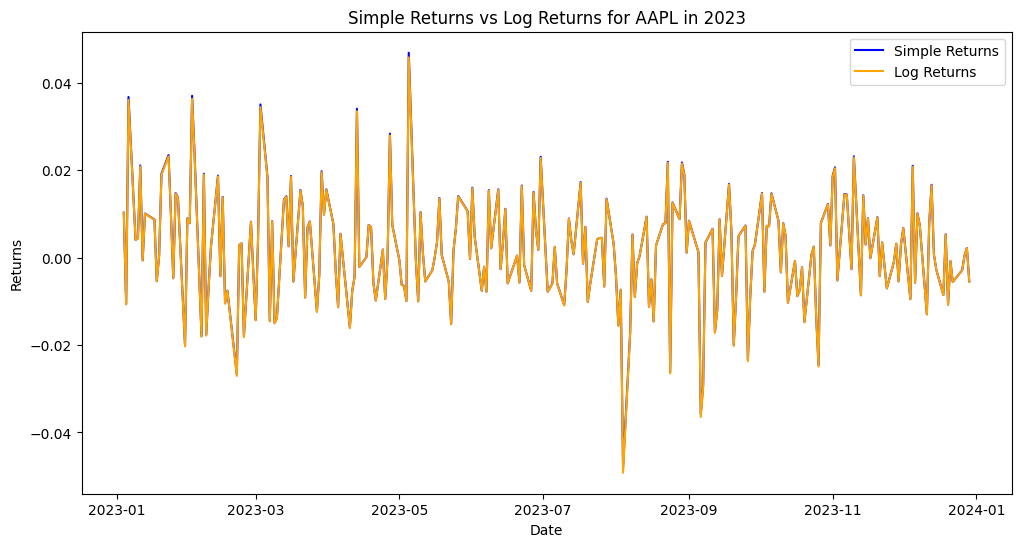

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(simple_returns.index, simple_returns, label='Simple Returns', color='blue')
plt.plot(log_returns.index, log_returns, label='Log Returns', color='orange')
plt.title('Simple Returns vs Log Returns for AAPL in 2023')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.show()

## Volatality

In [8]:
# daily standard deviation(volatility)
vol_daily = log_returns.std()
vol_daily

np.float64(0.012549834196324735)

In [9]:
# annualized volatility
vol_annualized = vol_daily * np.sqrt(252)  # Assuming 252 trading
vol_annualized

np.float64(0.19922244167141642)

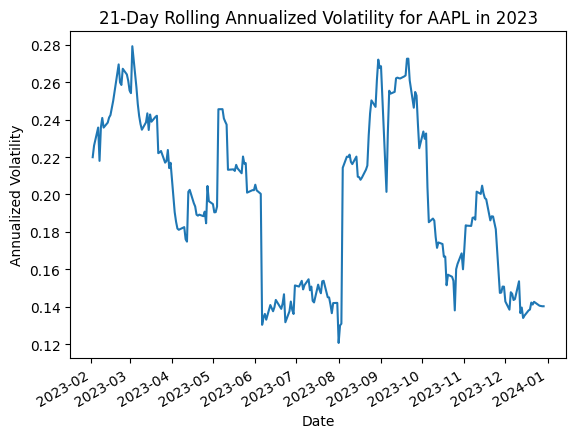

In [10]:
rolling_vol = log_returns.rolling(window=21).std() * np.sqrt(252)
rolling_vol.plot()
plt.title('21-Day Rolling Annualized Volatility for AAPL in 2023')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.show()

## Sharpe Ratio
comparing SR of 2 stocks on a risk-adjusted basis.

In [11]:
# gathering data
SPY_data = yf.download("SPY", start="2023-01-01", end="2024-01-01")[('Close','SPY')]
MSFT_data = yf.download("MSFT", start="2023-01-01", end="2024-01-01")[('Close','MSFT')]

# calculating log returns
SPY_log_returns = np.log(SPY_data / SPY_data.shift(1)).dropna()
MSFT_log_returns = np.log(MSFT_data / MSFT_data.shift(1)).dropna()

# SHARPE RATIO
risk_free_rate = 0.02  # 2% annual risk-free rate
SPY_sharpe = (SPY_log_returns.mean() * 252 - risk_free_rate) / (SPY_log_returns.std() * np.sqrt(252))
MSFT_sharpe = (MSFT_log_returns.mean() * 252 - risk_free_rate) / (MSFT_log_returns.std() * np.sqrt(252))

SPY_sharpe, MSFT_sharpe

/tmp/ipykernel_983/517759538.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SPY_data = yf.download("SPY", start="2023-01-01", end="2024-01-01")[('Close','SPY')]
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_983/517759538.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  MSFT_data = yf.download("MSFT", start="2023-01-01", end="2024-01-01")[('Close','MSFT')]
[*********************100%***********************]  1 of 1 completed


(np.float64(1.6785880666216353), np.float64(1.7800710642148314))

## Drawdown

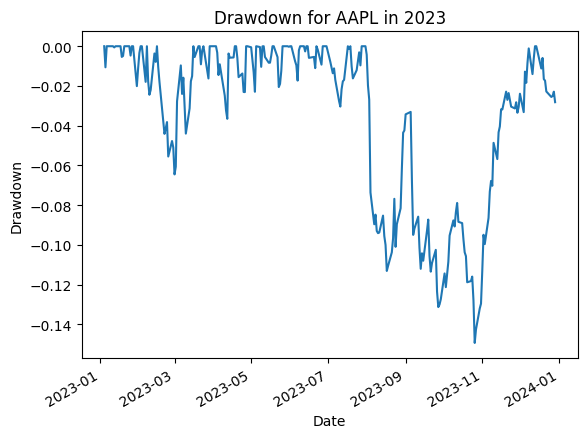

In [12]:
cumulative_returns = (1+simple_returns).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = cumulative_returns / rolling_max - 1
drawdown.plot()
plt.title('Drawdown for AAPL in 2023')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.show()

# EDA - DATA HEALTH AND STATIONARITY

In [13]:
# loading 5 tickers
tickers = ["AAPL", "MSFT", "TSLA", "AMZN", "NVDA", "SPY"]
start_date = "2018-01-01"
end_date = "2024-01-01"

# load data
data = yf.download(tickers=tickers, start=start_date, end=end_date)
prices = data['Close']
volumes = data['Volume']

print(prices.head())
print(volumes.head())

/tmp/ipykernel_983/4018188929.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=tickers, start=start_date, end=end_date)
[*********************100%***********************]  6 of 6 completed


Ticker           AAPL       AMZN       MSFT      NVDA         SPY       TSLA
Date                                                                        
2018-01-02  40.341888  59.450500  79.050377  4.928808  237.909164  21.368668
2018-01-03  40.334850  60.209999  79.418274  5.253192  239.413910  21.150000
2018-01-04  40.522213  60.479500  80.117256  5.280884  240.423111  20.974667
2018-01-05  40.983574  61.457001  81.110565  5.325634  242.025284  21.105333
2018-01-08  40.831352  62.343498  81.193344  5.488815  242.467834  22.427334
Ticker           AAPL      AMZN      MSFT       NVDA       SPY       TSLA
Date                                                                     
2018-01-02  102223600  53890000  22483800  355616000  86655700   65283000
2018-01-03  118071600  62176000  26061400  914704000  90070400   67822500
2018-01-04   89738400  60442000  21912000  583268000  80636400  149194500
2018-01-05   94640000  70894000  23407100  580124000  83524000   68868000
2018-01-08   8227

#### Finding missing data
data should only be missing on non-trading days. Any other NaN values indicated errors in fetching or unusual market events.

In [14]:
nan_counts = prices.isna().sum()
print("Number of missing values in each ticker:")
print(nan_counts)

Number of missing values in each ticker:
Ticker
AAPL    0
AMZN    0
MSFT    0
NVDA    0
SPY     0
TSLA    0
dtype: int64


use forward-fill (ffill) to ensure continuity

## Return calculation and visualization

In [15]:
simple_returns = prices.pct_change().dropna()
log_returns = np.log(prices / prices.shift(1)).dropna()

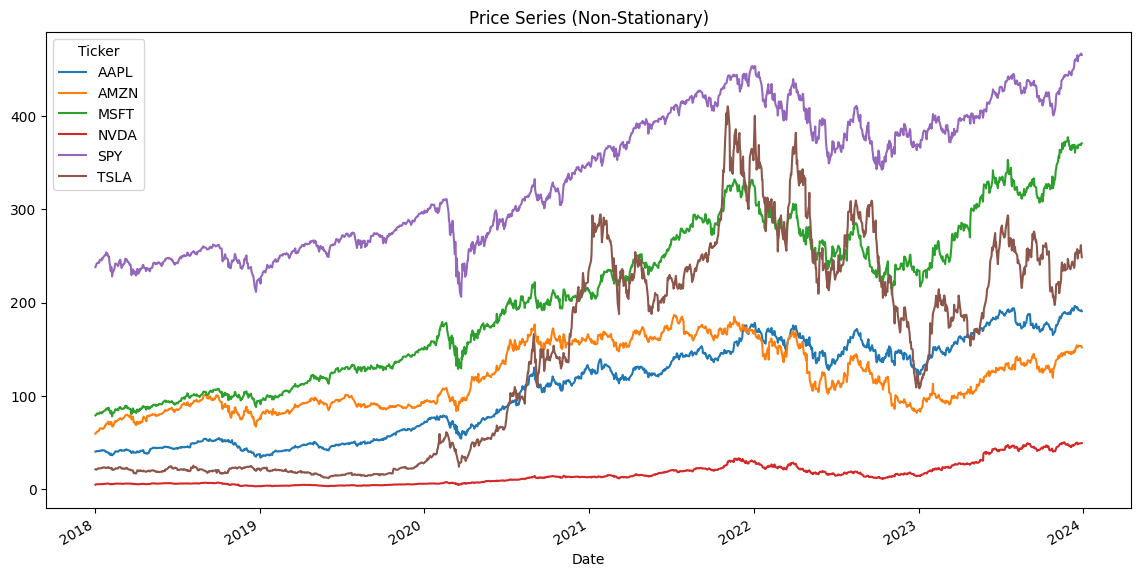

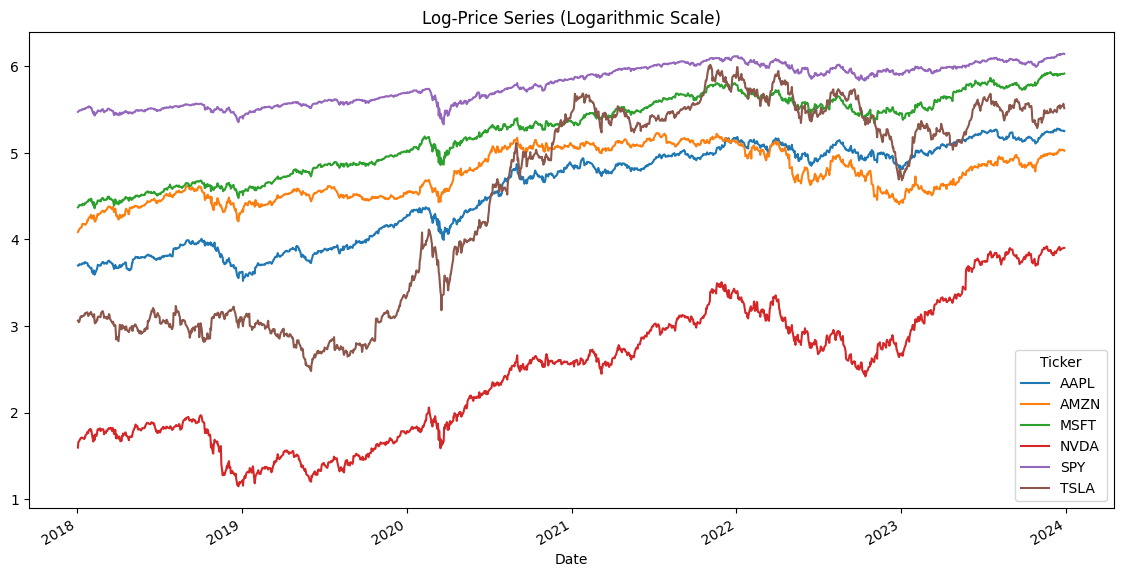

In [16]:
# Plot Price Series
prices.plot(figsize=(14, 7), title="Price Series (Non-Stationary)")
plt.show()


# Plot Log-Price Series
np.log(prices).plot(figsize=(14, 7), title="Log-Price Series (Logarithmic Scale)")
plt.show()

log prices visually compress the y-axis making earlier price action clearer.

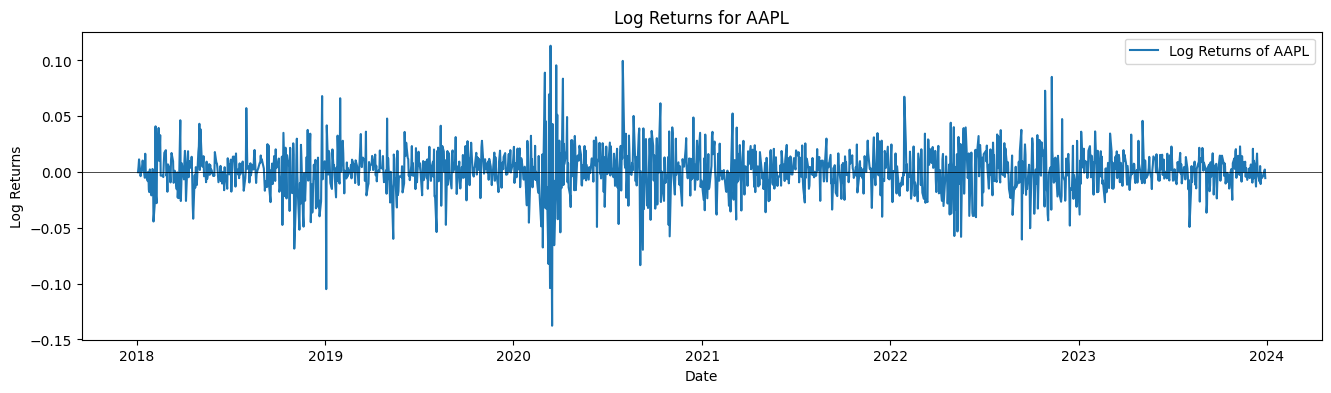

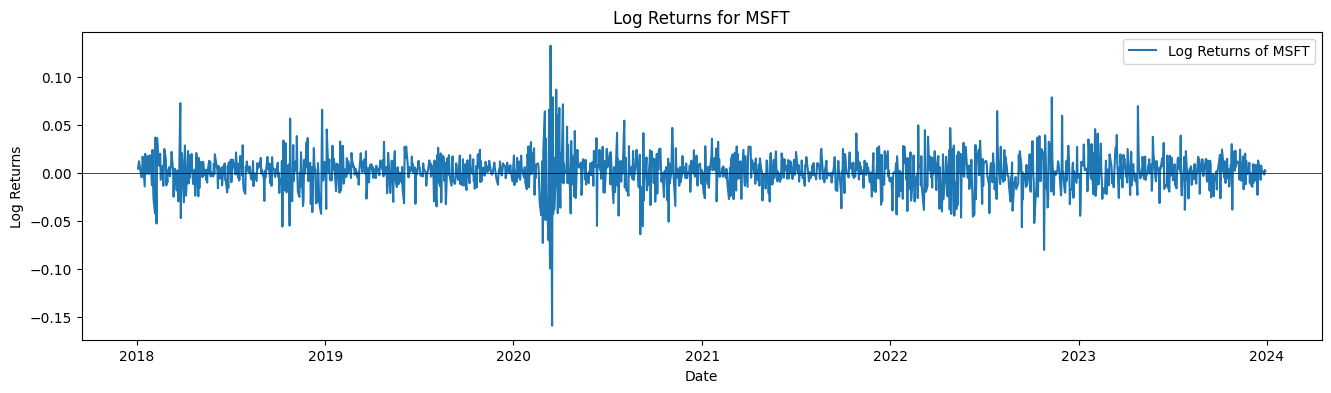

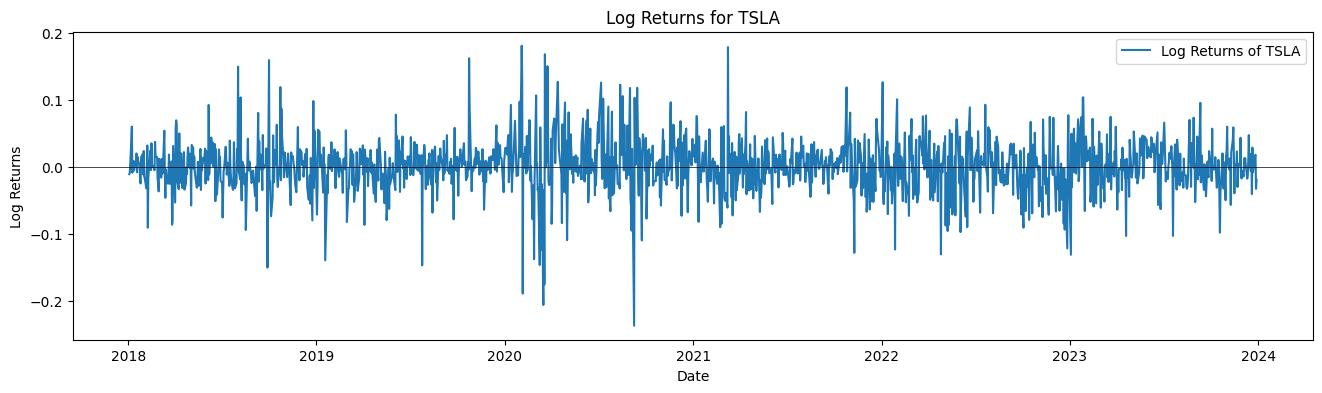

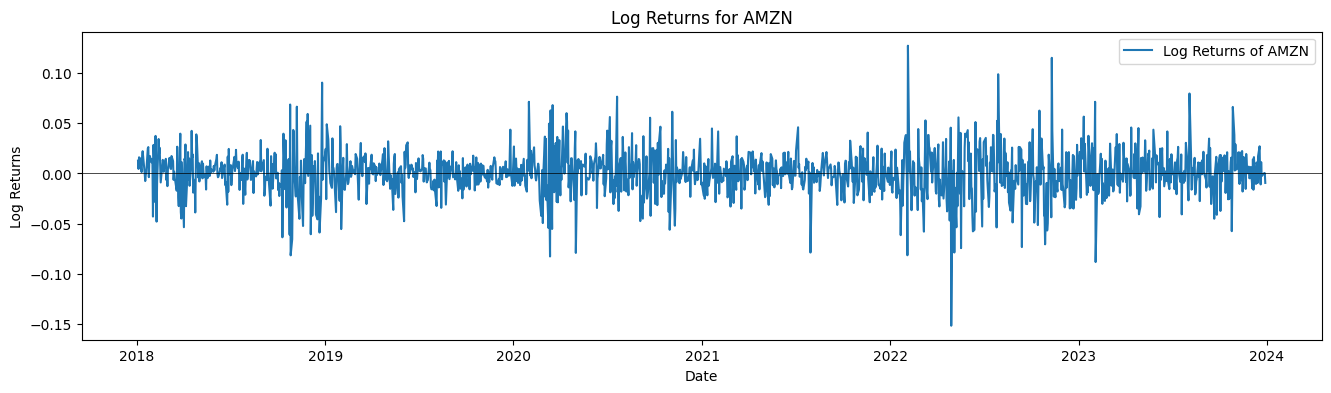

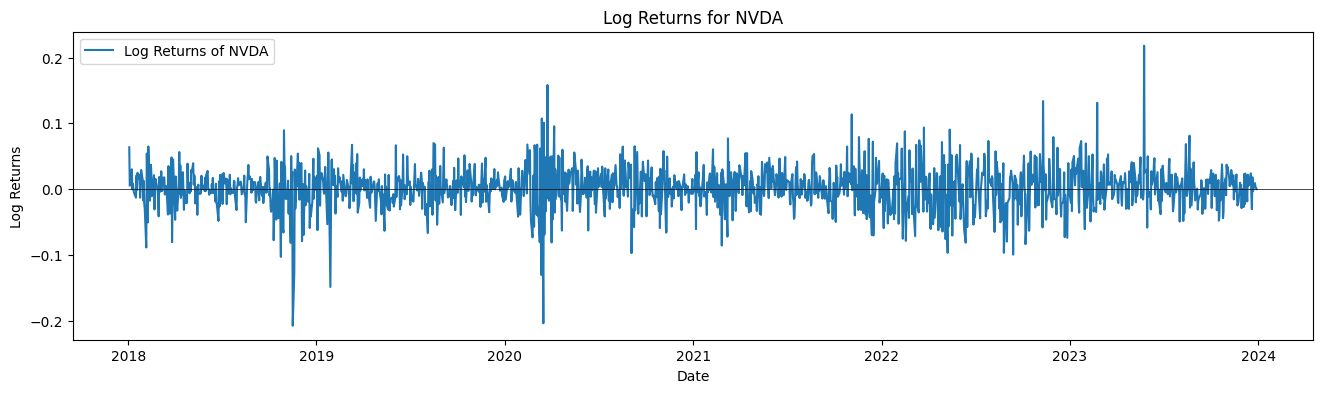

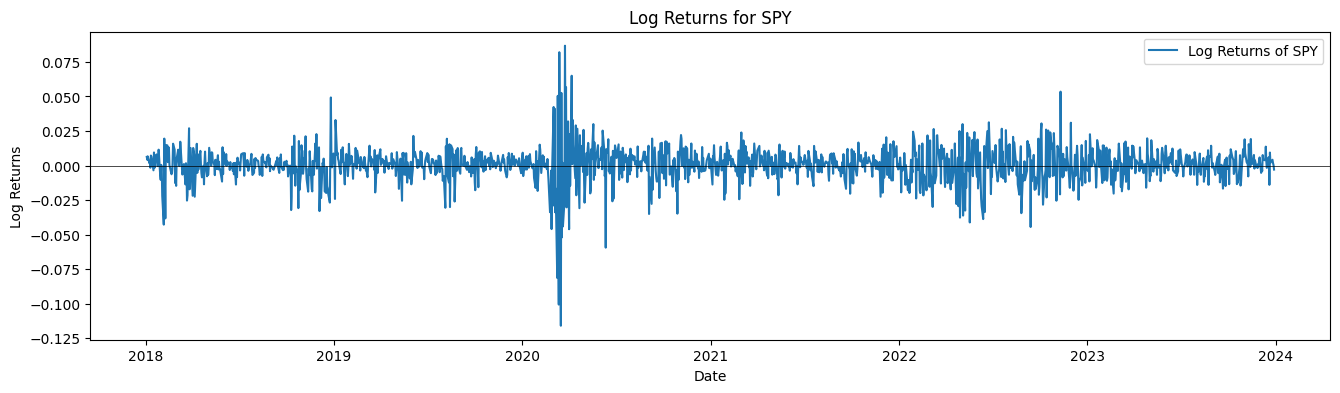

In [17]:
# plot log returns
for ticker in tickers:
    plt.figure(figsize=(16, 4))
    plt.plot(log_returns.index, log_returns[ticker], label=f'Log Returns of {ticker}')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='-')
    plt.title(f'Log Returns for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Log Returns')
    plt.legend()
    plt.show()


### Histogram and KDE for returns

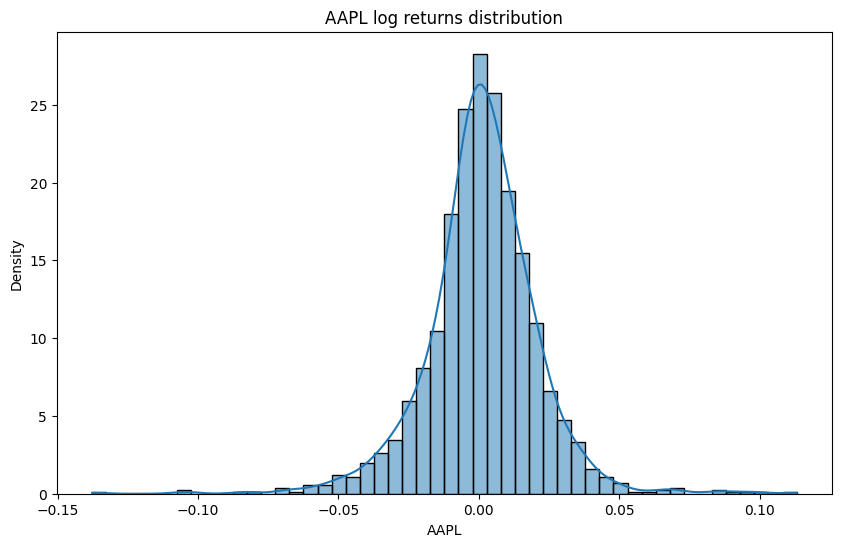

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(log_returns["AAPL"], bins=50, kde=True, stat="density")
plt.title('AAPL log returns distribution')
plt.show()


shows destribution of returns, fat tails and highly peaked center

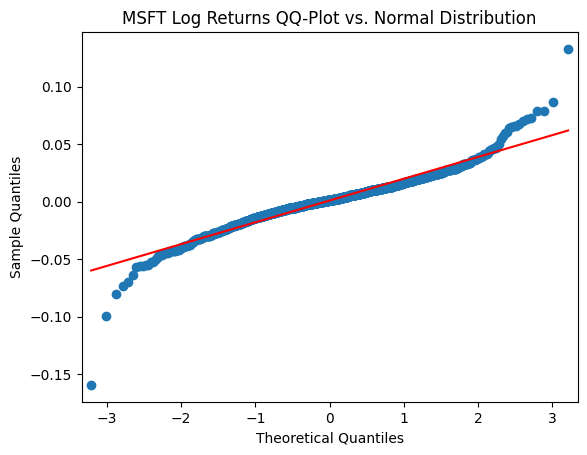

In [19]:
from statsmodels.graphics.gofplots import qqplot

qqplot(log_returns['MSFT'], line='s') # 's' means standardized line
plt.title('MSFT Log Returns QQ-Plot vs. Normal Distribution')
plt.show()

quartile-quantile(QQ) plot is best visual test for normality. if data were normal, poitns would lie perfectly on the 45 degree line.
Financial returns show points that curve upward on the top right and downward on the bottom left, deviating significantly from the line. This confirms fat tailsextreme events are more common than a normal distribution suggests.

## Stationarity tests
stationarity is the assumption that statistical properties of a time series (mean, variance, autocorrelation) do not change over time.


### rolling mean/variance visual inspection

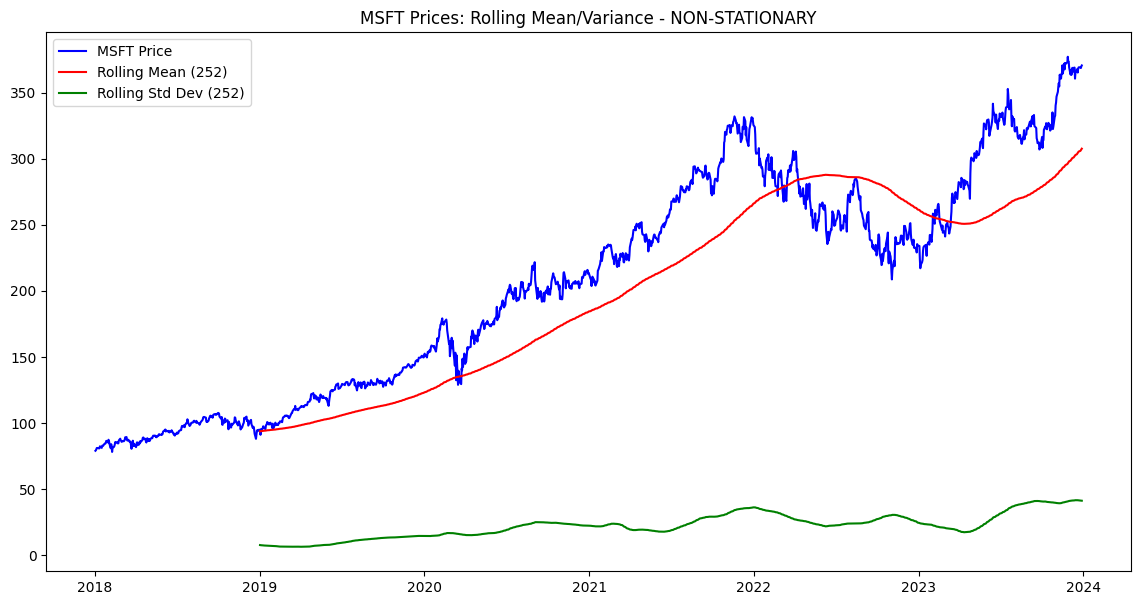

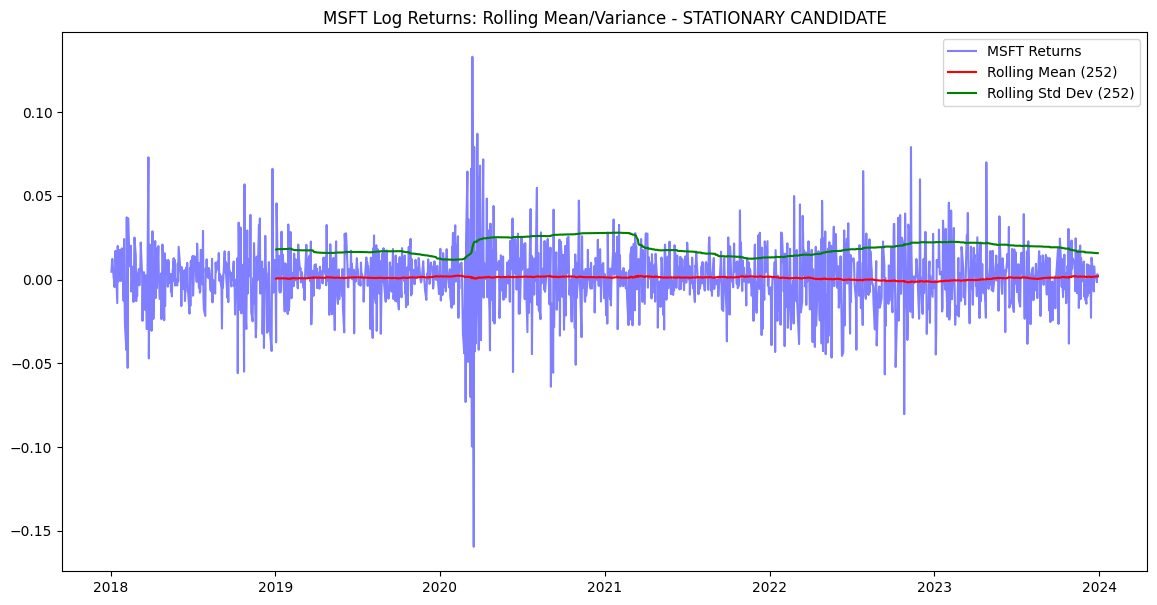

In [20]:
# calc rolling stats for MSFT prices (1 year window)
msft_prices_rolling = prices['MSFT'].rolling(window=252)

plt.figure(figsize=(14, 7))
plt.plot(prices['MSFT'], color='blue', label='MSFT Price')
plt.plot(msft_prices_rolling.mean(), color='red', label='Rolling Mean (252)')
plt.plot(msft_prices_rolling.std(), color='green', label='Rolling Std Dev (252)')
plt.title('MSFT Prices: Rolling Mean/Variance - NON-STATIONARY')
plt.legend()
plt.show()

# calc rolling stats for MSFT log returns (1 year window)
msft_returns_rolling = log_returns['MSFT'].rolling(window=252)

plt.figure(figsize=(14, 7))
plt.plot(log_returns['MSFT'], color='blue', label='MSFT Returns', alpha=0.5)
plt.plot(msft_returns_rolling.mean(), color='red', label='Rolling Mean (252)')
plt.plot(msft_returns_rolling.std(), color='green', label='Rolling Std Dev (252)')
plt.title('MSFT Log Returns: Rolling Mean/Variance - STATIONARY CANDIDATE')
plt.legend()
plt.show()

confirms that raw prices are non-stationary and the returns are a better candidate for stationarity.

#### Augmented Dickey fuller (ADF) test

In [21]:
from statsmodels.tsa.stattools import adfuller

def check_adf_stationarity(series, name):
    """Performs the ADF test and prints results."""
    result = adfuller(series.dropna())
    print(f"\n--- ADF Test Results for {name} ---")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"P-value: {result[1]:.4f}")
    if result[1] <= 0.05:
        print(f"Conclusion: Reject H0. The {name} series is likely STATIONARY.")
    else:
        print(f"Conclusion: Fail to Reject H0. The {name} series is NON-STATIONARY.")

# Test 1: Prices (Expected: Non-Stationary)
check_adf_stationarity(prices['MSFT'], "MSFT Prices")

# Test 2: Log Returns (Expected: Stationary)
check_adf_stationarity(log_returns['MSFT'], "MSFT Log Returns")


--- ADF Test Results for MSFT Prices ---
ADF Statistic: -0.2911
P-value: 0.9268
Conclusion: Fail to Reject H0. The MSFT Prices series is NON-STATIONARY.

--- ADF Test Results for MSFT Log Returns ---
ADF Statistic: -12.9805
P-value: 0.0000
Conclusion: Reject H0. The MSFT Log Returns series is likely STATIONARY.


## Autocorrelation
measures how much a time series is correlated to its own past values.
ACF : Autocorrelation Function :- shows correlation between series and its lagged versions.
PACF : Partial Autocorrelation Function :- same as ACF but shows lagged version after removing the effect of intermedaite lags.

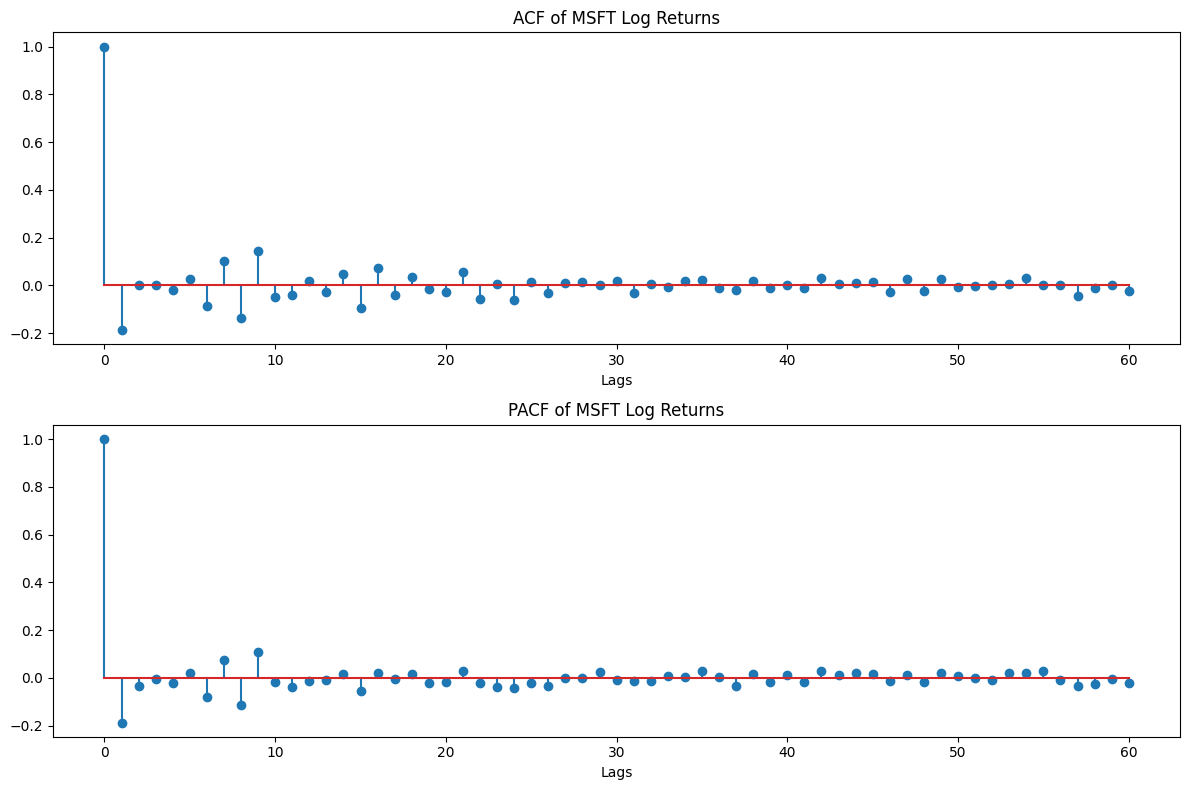

In [22]:
from statsmodels.graphics.tsaplots import acf, pacf

# plot ACF and PACF for MSFT log returns
lags = 60   # upto 60 days lag (approximately 3 months of trading days)
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
acf_vals = acf(log_returns['MSFT'], nlags=lags)
axes[0].stem(range(lags + 1), acf_vals, markerfmt='o')
axes[0].set_title('ACF of MSFT Log Returns')
axes[0].set_xlabel('Lags')

# PACF Plot
pacf_vals = pacf(log_returns['MSFT'], nlags=lags, method='ols') # OLS method is common
axes[1].stem(range(lags + 1), pacf_vals, markerfmt='o')
axes[1].set_title('PACF of MSFT Log Returns')
axes[1].set_xlabel('Lags')

plt.tight_layout()
plt.show()

significant spikes suggest short term predictability

## Mini-challenge
Find a period where volatility regime clearly shifts (e.g., 2020 COVID). Mark it and compute mean/volatility before/after.

In [23]:
# shift date(end of February 2020, just before the crash)
shift_date = '2020-03-01'
ticker_to_analyze = 'SPY' # Use SPY as the broad market index

# Split data into two regimes
pre_covid_returns = log_returns[ticker_to_analyze].loc[:shift_date].dropna()
post_covid_returns = log_returns[ticker_to_analyze].loc[shift_date:].dropna()

# Compute mean and volatility (standard deviation) before and after
mean_pre = pre_covid_returns.mean() * 252 * 100 # Annualized %
vol_pre = pre_covid_returns.std() * np.sqrt(252) * 100 # Annualized %

mean_post = post_covid_returns.mean() * 252 * 100 # Annualized %
vol_post = post_covid_returns.std() * np.sqrt(252) * 100 # Annualized %

print(f"\n--- Volatility Regime Shift Analysis for {ticker_to_analyze} ---")
print(f"Period Before {shift_date}:")
print(f"  Annualized Mean Return: {mean_pre:.2f}%")
print(f"  Annualized Volatility: {vol_pre:.2f}%")

print(f"\nPeriod After {shift_date}:")
print(f"  Annualized Mean Return: {mean_post:.2f}%")
print(f"  Annualized Volatility: {vol_post:.2f}%")


--- Volatility Regime Shift Analysis for SPY ---
Period Before 2020-03-01:
  Annualized Mean Return: 6.27%
  Annualized Volatility: 15.40%

Period After 2020-03-01:
  Annualized Mean Return: 13.97%
  Annualized Volatility: 22.83%


Volatility is MUCH higher in the post-COVID regime, demonstrating a clear regime shift.